In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
def combine_names(x):
    if 'Lawrenceville' in x:
        x = 'Lawrenceville'
    elif 'Oakland' in x:
        x = 'Oakland'
    elif 'Squirrel Hill' in x:
        x = 'Squirrel Hill'
    return x

district_names = ["Central Business District","Strip District","Shadyside","Squirrel Hill",
                  "Oakland","South Side Flats","Bloomfield","Highland Park","East Liberty",
                  "North Shore","Lawrenceville","Greenfield","Hazelwood"]
df = pd.read_csv("https://data.wprdc.org/datastore/dump/8d76ac6b-5ae8-4428-82a4-043130d17b02")
df = df[['_id','incident_type','type_description','neighborhood']]
df = df.dropna()
df['neighborhood'] = df['neighborhood'].apply(combine_names)
df = df[df['neighborhood'].isin(district_names)]

In [3]:
data = df.assign(count=1)
data = data.groupby('neighborhood',as_index=False).sum()
data = data.sort_values('count',ascending=False,ignore_index=True)
data[['neighborhood','count']]

,neighborhood,count
0,Squirrel Hill,406
1,Oakland,396
2,Central Business District,292
3,South Side Flats,290
4,Hazelwood,257
5,East Liberty,219
6,Lawrenceville,198
7,Shadyside,193
8,Bloomfield,183
9,Greenfield,124


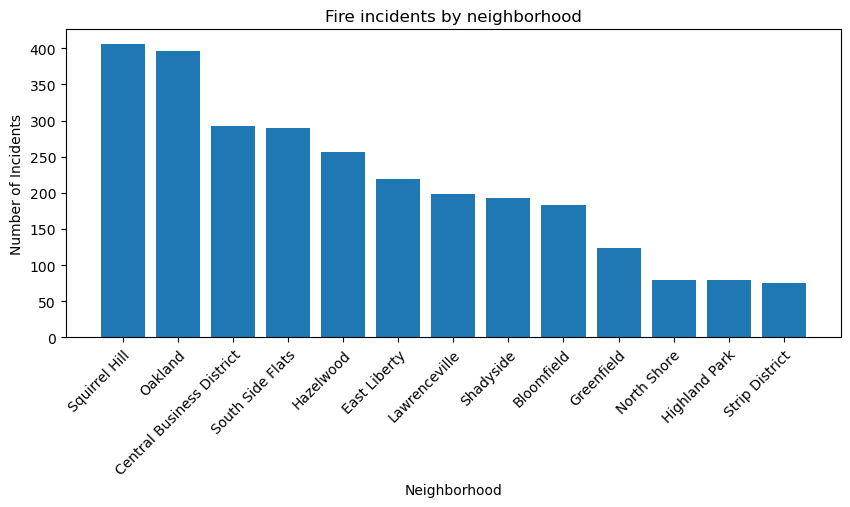

In [4]:
hoods = data['neighborhood']
counts = data['count']

fig,ax = plt.subplots(figsize=(10, 4))
ax.bar(hoods,counts)
ax.set_xticks(hoods,labels=hoods,rotation=45,rotation_mode='anchor',ha='right')
ax.set_xlabel('Neighborhood')
ax.set_ylabel('Number of Incidents')
ax.set_title('Fire incidents by neighborhood')
plt.show()

In [14]:
fire_types = {'high':[110,111,112,120,121,122,123,141,142,161,162,163],
              'moderate':[113,130,131,132,133,134,135,136,138,140,143,164],
              'low':[114,115,116,117,118,150,151,152,153,154,155]}
levels = list(fire_types.keys())
data = df.copy()
data.loc[data['incident_type'].isin(fire_types['low']),'hazard_level'] = 'low'
data.loc[data['incident_type'].isin(fire_types['moderate']),'hazard_level'] = 'moderate'
data.loc[data['incident_type'].isin(fire_types['high']),'hazard_level'] = 'high'
data.replace('nan',np.nan,inplace=True)
data = data.dropna()
data = data.assign(count=1)

countdf = pd.DataFrame(columns=['neighborhood','low','moderate','high','total'])
countdf['neighborhood'] = district_names
for level in levels:
    typedata = data[data['hazard_level']==level]
    typedata = typedata.groupby('neighborhood',as_index=False).sum()
    typemap = dict(typedata[['neighborhood','count']].values)
    countdf[level] = countdf['neighborhood'].map(typemap)
    
countdf['total'] = countdf['low']+countdf['moderate']+countdf['high']
countdf.sort_values('total',ascending=False,inplace=True,ignore_index=True)
countdf

,neighborhood,low,moderate,high,total
0,Squirrel Hill,81,200,106,387
1,Oakland,106,178,97,381
2,Central Business District,110,112,62,284
3,South Side Flats,103,109,53,265
4,Hazelwood,89,93,68,250
5,East Liberty,54,96,65,215
6,Lawrenceville,49,70,65,184
7,Shadyside,36,97,50,183
8,Bloomfield,41,72,54,167
9,Greenfield,33,44,38,115


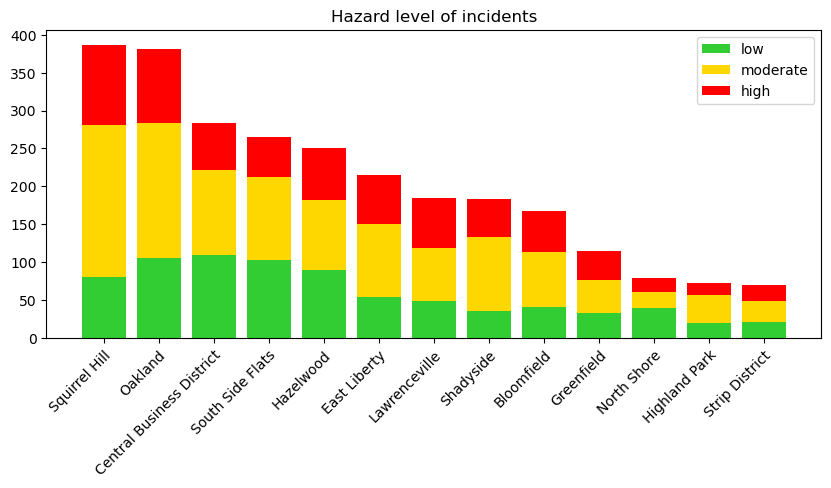

In [19]:
fig,ax = plt.subplots(figsize=(10, 4))
ax.bar(countdf['neighborhood'],countdf['low'],color='limegreen')
ax.bar(countdf['neighborhood'],countdf['moderate'],bottom=countdf['low'],color='gold')
ax.bar(countdf['neighborhood'],countdf['high'],bottom=countdf['low']+countdf['moderate'],color='red')
ax.set_xticks(hoods,labels=hoods,rotation=45,rotation_mode='anchor',ha='right')
ax.legend(['low','moderate','high'])
ax.set_title('Hazard level of incidents')
plt.show()